# Mini Project: Logistic Regression

Logistic Regression models the probability that a given input belongs to a certain class. It's suitable when the target variable is categorical and represents two classes (e.g., 0 or 1, True or False, Yes or No), although it can also be extended for problems with more than two classes. The key idea behind logistic regression is to model the relationship between the input variables (features) and the probability of the outcome.

In logistic regression, the linear combination of input features is transformed using a logistic function (also known as the sigmoid function), which ensures that the output is between 0 and 1. This output can be interpreted as the probability of the instance belonging to a particular class.

**Advantages of Logistic Regression:**

1. **Simple and Interpretable:** Logistic regression is a straightforward algorithm that's relatively easy to understand and interpret. The output is the probability of belonging to a certain class, and the coefficients associated with each feature provide insights into feature importance.

2. **Efficient for Small Datasets:** It works well with small datasets where the number of samples is not very large. It's less prone to overfitting in such cases compared to complex models.

3. **Works Well for Linearly Separable Data:** When the classes are separable by a linear decision boundary, logistic regression can perform quite well.

4. **Good Starting Point:** Logistic regression is often used as a starting point for understanding a classification problem. It can serve as a baseline model against which more complex algorithms can be compared.

5. **Regularization:** Logistic regression can be regularized to prevent overfitting. Regularization techniques like L1 (Lasso) and L2 (Ridge) regularization can be applied to control the complexity of the model.

6. **Probability Estimation:** Logistic regression not only provides class predictions but also outputs the probability of the prediction. This can be useful for decision-making in cases where the cost of misclassification varies.

However, it's important to note that logistic regression also has its limitations. It assumes a linear relationship between features and the log-odds of the target variable, which might not be suitable for highly complex relationships. Additionally, it might struggle with handling non-linear data without feature transformations. In such cases, more advanced techniques like decision trees, random forests, or neural networks might be more appropriate.

In this project you'll get some experience building a logistic regression model for the [Wisconsin Breast Cancer Detection dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Note, the task of training a logistic regression model has largely been asbtracted away by libraries like Scikit-Learn. In this mini-project we'll focus more on model evaluation and interpretation.  


First, let's import all the libraries we'll be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Logistic Regression, like many statistical methods, comes with certain assumptions about the underlying data. Here are the main assumptions associated with logistic regression:

1. **Binary Outcome:** Logistic regression is designed for binary classification problems, where the dependent variable (target) should have two categories or levels. If you have a multi-class problem, you would typically use multinomial logistic regression or other appropriate techniques.

2. **Independence of Observations:** The observations (samples) should be independent of each other. This means that the outcome of one observation should not be influenced by the outcome of another observation. This assumption is often met when the data is collected using random sampling or experimental designs.

3. **Linearity of Log-Odds:** The relationship between the log-odds of the outcome and the predictors should be linear. In other words, the log-odds of the outcome variable should change linearly with changes in the predictor variables. This assumption can be checked by examining scatter plots and residual plots.

4. **No Multicollinearity:** There should not be high multicollinearity among the predictor variables. Multicollinearity can make it difficult to determine the individual effect of each predictor on the outcome. Techniques like variance inflation factor (VIF) can be used to assess multicollinearity.

5. **Large Sample Size:** While logistic regression is generally more robust to violations of assumptions compared to linear regression, having a reasonably large sample size helps in obtaining stable and reliable parameter estimates.

6. **Sufficient Variability in the Outcome:** The outcome variable should exhibit variation across different values of the predictor variables. If all values of a predictor are the same within a level of the outcome, the model may not be able to estimate the effect of that predictor.

7. **No Extreme Outliers:** Extreme outliers can influence the estimation of coefficients and affect the overall performance of the model. It's a good practice to identify and handle outliers before fitting the model.

It's important to note that while these assumptions are important to understand, logistic regression is often used in real-world scenarios where some of these assumptions may not be perfectly met. In such cases, it's crucial to assess the impact of potential violations on the model's results and make informed decisions about the model's suitability and reliability.

If the assumptions are significantly violated, it might be worth considering other techniques like decision trees, random forests, or support vector machines, which might be more robust to certain types of data characteristics. One of the best ways to see if logistic regression is suitable for a problem is to simply train a logistic regression model and evaluate it on test data.

Here are your tasks:

1. Load the [breast cancer data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) into a Pandas dataframe and create variables for the features and target.
2. Do a little exploratory data analysis to help familiarize yourself with the data. Look at the first few rows of data, for example. Generate some summary statistics for each feature. Look at the distribution of the target variable. Maybe create a pair-plot for some of the variables. Create a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) of correlation between features. Is the multicollinearity assumption broken? Also, generate some boxplots to see how feature distributions change for each target. This part is a bit open-ended. Be creative!

In [2]:
# Load data and split into feature and target variables
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
data = pd.concat([X, y], axis=1)

In [3]:
# View first 5 rows of the data
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Positive target frequency: 62.7% (357 occurences)
Negative target frequency: 37.3% (212 occurences)


([<matplotlib.axis.XTick at 0x7e2a96110250>,
 [Text(0, 0, 'Benign (1)'), Text(1, 0, 'Malignant (0)')])

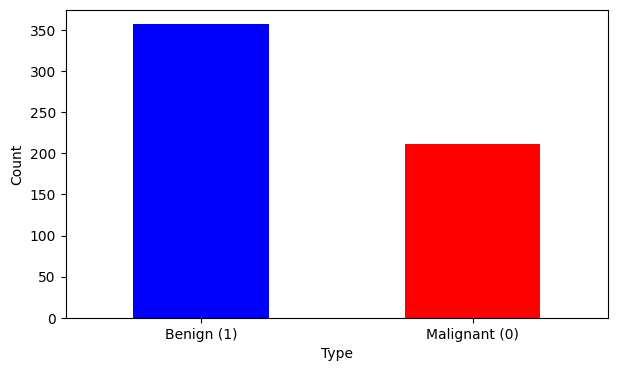

In [4]:
# How frequently does the positive target occur?
pos_count, neg_count = y.value_counts()
pos_freq, neg_freq = y.value_counts(normalize=True)

print(f"Positive target frequency: {pos_freq * 100:.1f}% ({pos_count} occurences)")
print(f"Negative target frequency: {neg_freq * 100:.1f}% ({neg_count} occurences)")

plt.figure(figsize=(7,4))
y.value_counts().plot(kind='bar', color=['b', 'r'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Benign (1)', 'Malignant (0)'], rotation=0)

In [5]:
# Generate summary statistics for the data
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


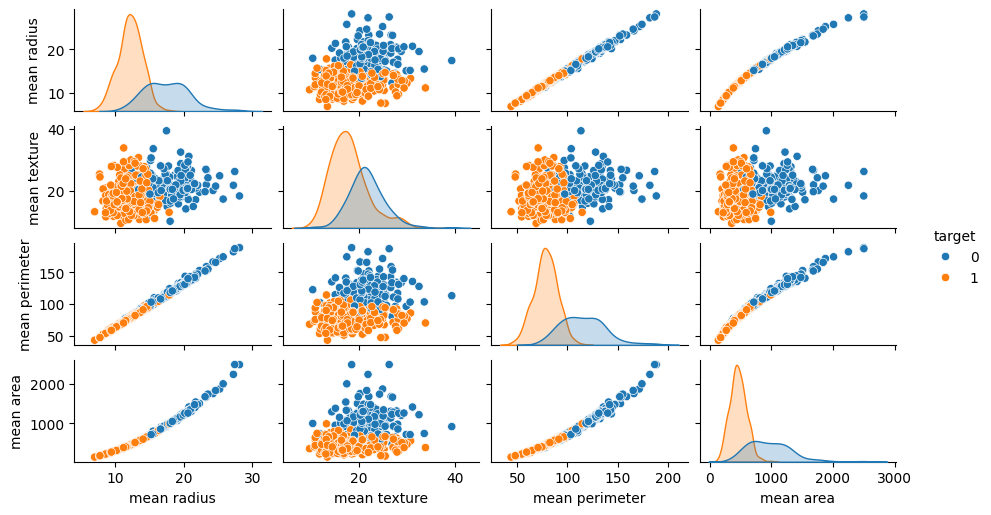

In [6]:
# Create a pairplot for the first few features
select_features = X.columns[:4]
selection = pd.concat([data[select_features], y], axis=1)

sns.pairplot(selection, hue='target', height=1.3, aspect=1.8)

In [7]:
## EXTRA ##
def apply_mask(data, mask=None):
    if mask is None:
        mask = np.triu(np.ones_like(data, dtype=bool))
    masked_data = data * ~mask
    return masked_data


def draw_heatmap(data, title, mask=None, cmap='coolwarm', figsize=(7, 6), **kwargs):
    if mask is None:
        mask = np.triu(np.ones_like(data, dtype=bool))

    plt.figure(figsize=figsize)
    sns.heatmap(
        data,
        cmap=cmap,
        square=True,
        mask=mask,
        **kwargs
    )
    plt.title(title)
    plt.show()

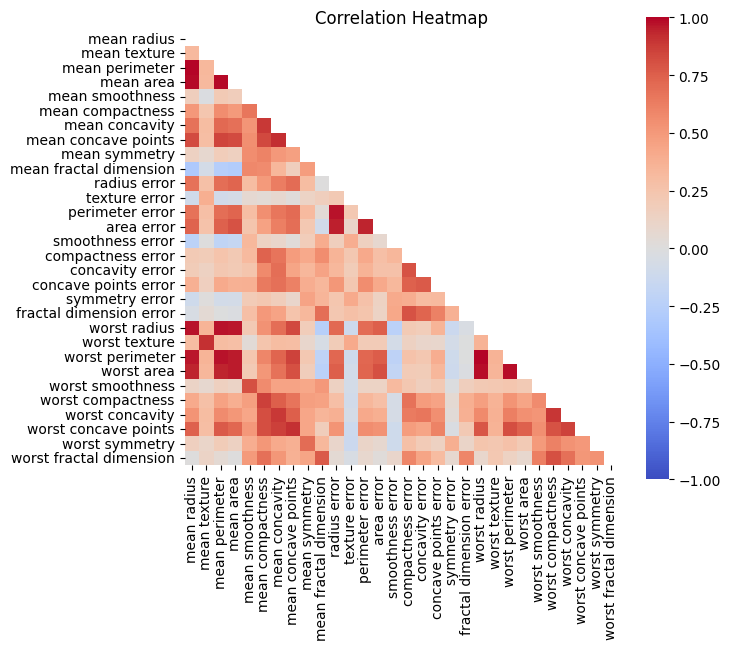

In [8]:
# Create a correlation coefficeint heatmap
corr_matrix = X.corr()
draw_heatmap(corr_matrix, title='Correlation Heatmap', vmin=-1, vmax=1)

**================================================================================================**

**Multicollinearity in the Dataset**

Prevalence of warm colors in the correlation matrix hints high multicollinearity among certain feature subsets.


**About Multicollinearity**

Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated, meaning they are not linearly independent. This can make it difficult to determine the individual effect of each predictor because the variables share redundant information, leading to inflated standard errors and unstable estimates of the regression coefficients.

**================================================================================================**

In [9]:
## EXTRA ##
masked_matrix = apply_mask(corr_matrix)
print(f"Largest correlation values between feature pairs:\n"
      f"{masked_matrix.stack().nlargest(10)}")

Largest correlation values between feature pairs:
mean perimeter   mean radius        0.997855
worst perimeter  worst radius       0.993708
mean area        mean radius        0.987357
                 mean perimeter     0.986507
worst area       worst radius       0.984015
                 worst perimeter    0.977578
perimeter error  radius error       0.972794
worst perimeter  mean perimeter     0.970387
worst radius     mean radius        0.969539
                 mean perimeter     0.969476
dtype: float64


In [10]:
## EXTRA ##
import time

def calculate_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Time taken by {func.__name__}: {end_time - start_time:.6f} seconds")
        return result
    return wrapper

**================================================================================================**

**Extreme Multicollinearity in Some Feature Groups**

Some features in the dataset are highly multicollinear among themselves, such that a heatmap representing these sets can be entirely red.

**================================================================================================**

In [11]:
## EXTRA ##
from itertools import combinations

@calculate_time
def get_best_matrix(corr_matrix, n, limit=0.5):
    """
    Finds the sub-matrix (size: n x n) with the highest multicollinearity
    where the correlation between each feature pair is higher that 'limit'
    """
    corr_matrix.where(corr_matrix > limit)
    columns = corr_matrix.columns
    corr_values = np.abs(corr_matrix.values)

    best_group = []
    best_score = float('-inf')
    for group in combinations(columns, n):
        score = 1
        for pair in combinations(group, 2):
            corr_val = corr_values[columns.get_loc(pair[0]), columns.get_loc(pair[1])]
            if corr_val < limit:
                score = float('-inf')
                break
            score *= corr_val
            if score < best_score or score <= 0:  # short-circuit
                break
        if score > best_score:
            best_score = score
            best_group = list(group)

    print("best_group:", best_group)
    best_matrix = corr_matrix.loc[best_group, best_group]
    return best_matrix

best_group: ['mean radius', 'mean perimeter', 'mean area', 'worst radius', 'worst perimeter', 'worst area']
Time taken by get_best_matrix: 4.532823 seconds


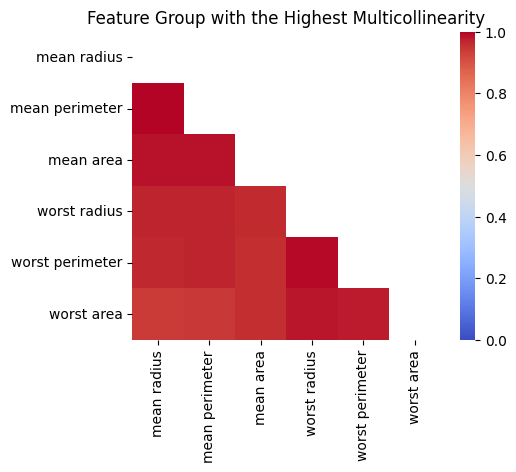

In [12]:
## EXTRA ##
best_matrix = get_best_matrix(corr_matrix, n=6)
draw_heatmap(best_matrix,
             title='Feature Group with the Highest Multicollinearity',
             figsize=(5, 4),
             vmin=0,
             vmax=1)

**================================================================================================**

**Variance Inflation Factor**

Variance Inflation Factor (VIF) quantifies the extent of multicollinearity in a regression model. It measures how much the variance of a regression coefficient is inflated due to the correlation with other independent variables. A VIF value above 5 suggests moderate multicollinearity, while a value above 10 indicates significant multicollinearity, which could affect the reliability of the model's coefficients.

**================================================================================================**

In [13]:
## EXTRA ##
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [vif(df.values, i) for i in range(df.shape[1])]
    return vif_data

vif_ = calculate_vif(X)

vif_limit = 10
multicollinear_features = vif_[vif_["VIF"] > vif_limit]

is_multicollinear = any(multicollinear_features)
n_multicollinear = multicollinear_features.shape[0]

print(f"The data is {'not ' * ~is_multicollinear}multicollinear.\n")

print(f"{n_multicollinear} of the {X.shape[1]} "
      f"({(n_multicollinear/X.shape[1]) * 100:.0f}%) "
       "features in the dataset are multicollinear.")

print(f"\nViF for each feature:\n"
      f"====================================\n"
      f"{vif_.sort_values(by='VIF', ascending=False).to_string(index=False)}")

The data is multicollinear.

30 of the 30 (100%) features in the dataset are multicollinear.

ViF for each feature:
                feature          VIF
            mean radius 63306.172036
         mean perimeter 58123.586079
           worst radius  9674.742602
        worst perimeter  4487.781270
              mean area  1287.262339
             worst area  1138.759252
 mean fractal dimension   629.679874
worst fractal dimension   423.396723
        mean smoothness   393.398166
       worst smoothness   375.597155
          worst texture   343.004387
           mean texture   251.047108
           radius error   236.665738
         worst symmetry   218.919805
        perimeter error   211.396334
       mean compactness   200.980354
          mean symmetry   184.426558
         mean concavity   157.855046
    mean concave points   154.241268
   worst concave points   148.673180
      worst compactness   132.884276
        worst concavity    86.310362
             area error    72.466

In [14]:
## EXTRA ##
best_features = best_matrix.columns
subset_data = X[best_features]
print(f"\nViF for features in 'best_matrix':\n"
      f"==================================\n"
      f"{calculate_vif(subset_data).sort_values(by='VIF', ascending=False).to_string(index=False)}")


ViF for features in 'best_matrix':
        feature         VIF
 mean perimeter 8389.386181
    mean radius 8193.514826
   worst radius 3996.572468
worst perimeter 1998.012652
     worst area  502.636240
      mean area  486.060116


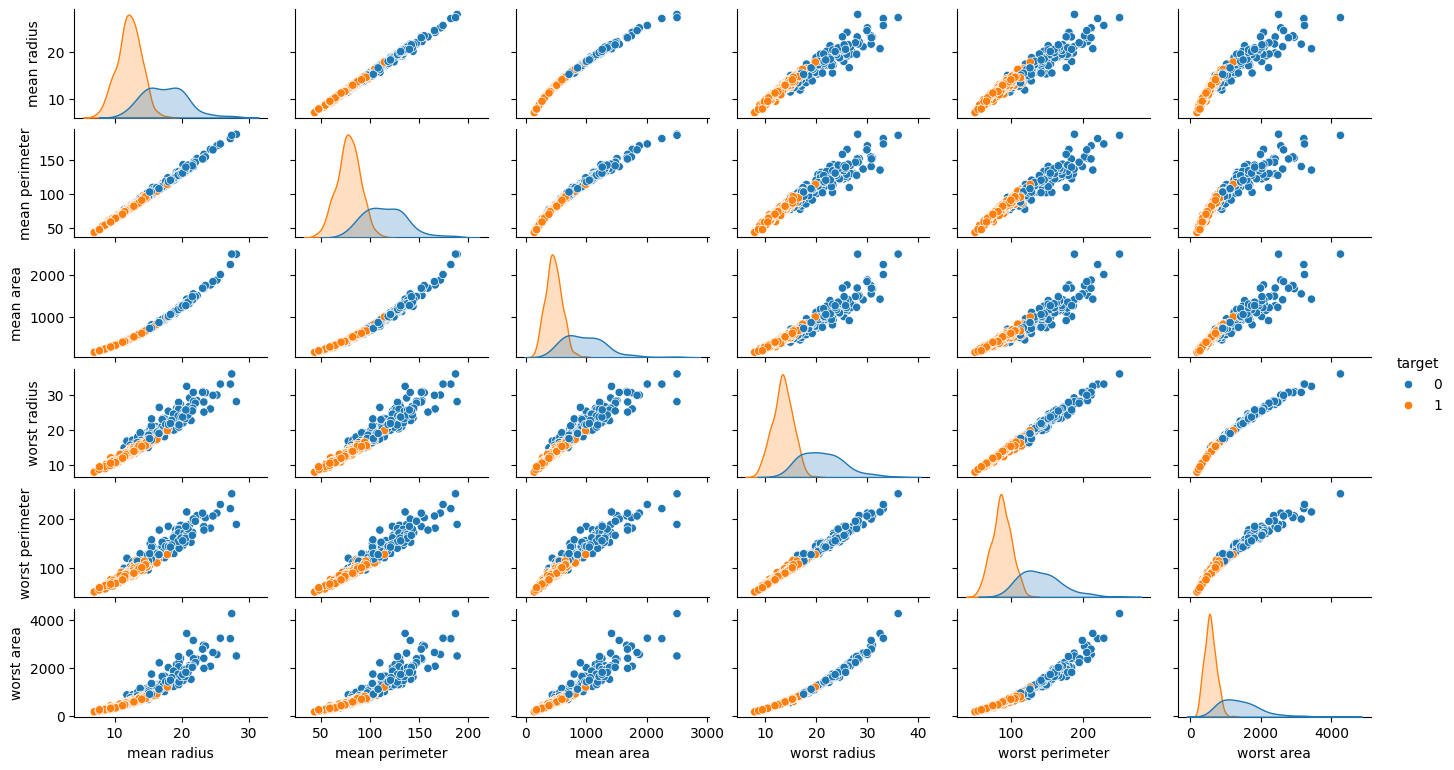

In [15]:
## EXTRA ##
selection = pd.concat([subset_data, y], axis=1)

sns.pairplot(selection, hue='target', height=1.3, aspect=1.8)

<Axes: xlabel='target', ylabel='mean radius'>

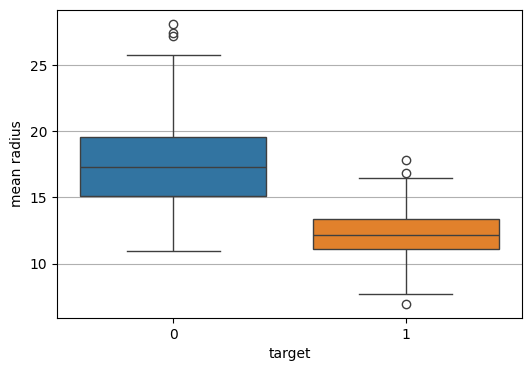

In [16]:
# Create a boxplot for mean radius by target type
plt.figure(figsize=(6, 4))
plt.grid(True)
sns.boxplot(x='target', y='mean radius', data=data, hue='target', legend=False)

**================================================================================================**

**Further Data Exploration and Visualizations**

**================================================================================================**

In [17]:
## EXTRA ##
def create_feature_boxplots(df, selection, title):
    rows = (len(selection) + 1) // 2
    fig, axes = plt.subplots(rows, 2, figsize=(8, 4 * rows))
    fig.suptitle(title, fontsize=15)

    colors = sns.color_palette("husl", len(selection))
    axes = axes.flatten()

    for ax, feature, color in zip(axes, selection, colors):
        sns.boxplot(data=df, x='target', y=feature, ax=ax, hue='target', palette=[color])
        ax.set_title(f"{feature}", fontsize=15)
        ax.set_xlabel('Target')
        ax.set_ylabel(feature)
        ax.set_xticklabels(['Benign (1)', 'Malignant (0)'])

    # Hide any unused subplots
    for ax in axes[len(selection):]:
        ax.set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

<ipython-input-17-c02b909888a1>:11: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='target', y=feature, ax=ax, hue='target', palette=[color])
<ipython-input-17-c02b909888a1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Benign (1)', 'Malignant (0)'])
<ipython-input-17-c02b909888a1>:11: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='target', y=feature, ax=ax, hue='target', palette=[color])
<ipython-input-17-c02b909888a1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Benign (1)', 'Malignant (0)'])
<ipython-input-17-c02b909888a1>:11: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot

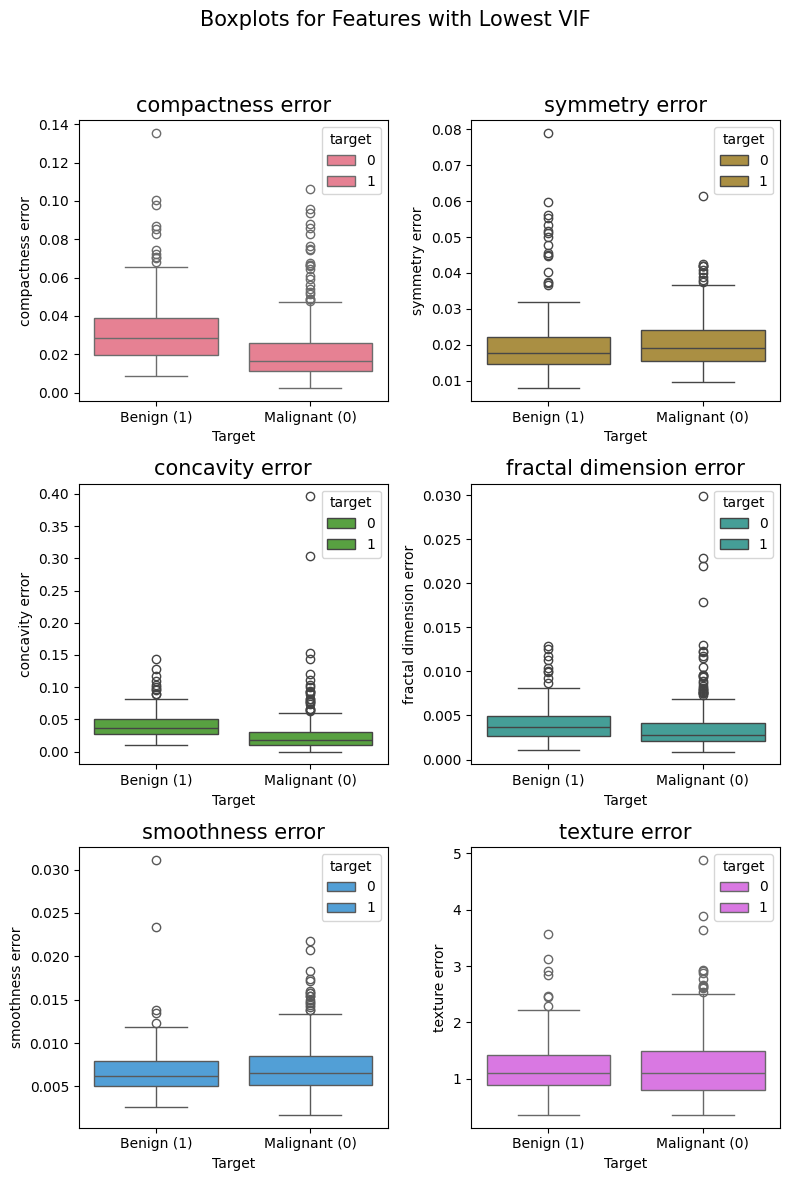

<ipython-input-17-c02b909888a1>:11: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='target', y=feature, ax=ax, hue='target', palette=[color])
<ipython-input-17-c02b909888a1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Benign (1)', 'Malignant (0)'])
<ipython-input-17-c02b909888a1>:11: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='target', y=feature, ax=ax, hue='target', palette=[color])
<ipython-input-17-c02b909888a1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Benign (1)', 'Malignant (0)'])
<ipython-input-17-c02b909888a1>:11: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot

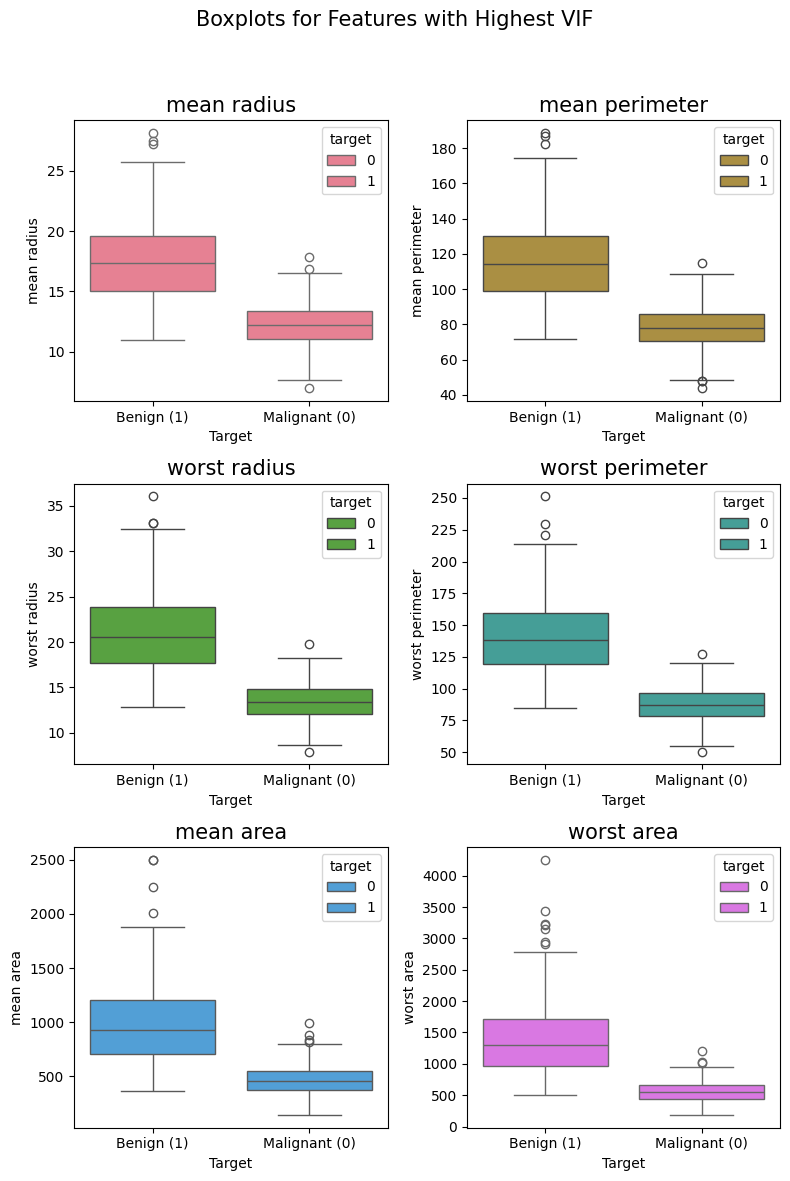

In [18]:
## EXTRA ##
sorted_vif = vif_.sort_values(by='VIF', ascending=False)

lowest_vif_features = list(sorted_vif.tail(6)['feature'])
highest_vif_features = list(sorted_vif.head(6)['feature'])

create_feature_boxplots(
    data,
    selection=lowest_vif_features,
    title='Boxplots for Features with Lowest VIF'
)

create_feature_boxplots(
    data,
    selection=highest_vif_features,
    title='Boxplots for Features with Highest VIF'
)

In [19]:
## EXTRA ##
def plot_feature_distributions(df, selection, title):
    # Determine the number of rows needed
    num_features = len(selection)
    rows = (num_features + 2) // 3  # +2 to ensure we round up for any remainder features

    fig, axes = plt.subplots(rows, 3, figsize=(20, 5 * rows))
    fig.suptitle(title, fontsize=15)

    axes = axes.flatten()  # Flatten in case we have multiple rows

    for ax, feature in zip(axes, selection):
        sns.histplot(
            data=df,
            x=feature,
            hue='target',
            kde=True,
            ax=ax,
            palette=['red', 'blue'],
            element='step'
        )
        ax.set_title(f"{feature}", fontsize=12)
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')

    # Hide any unused subplots
    for ax in axes[num_features:]:
        ax.set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

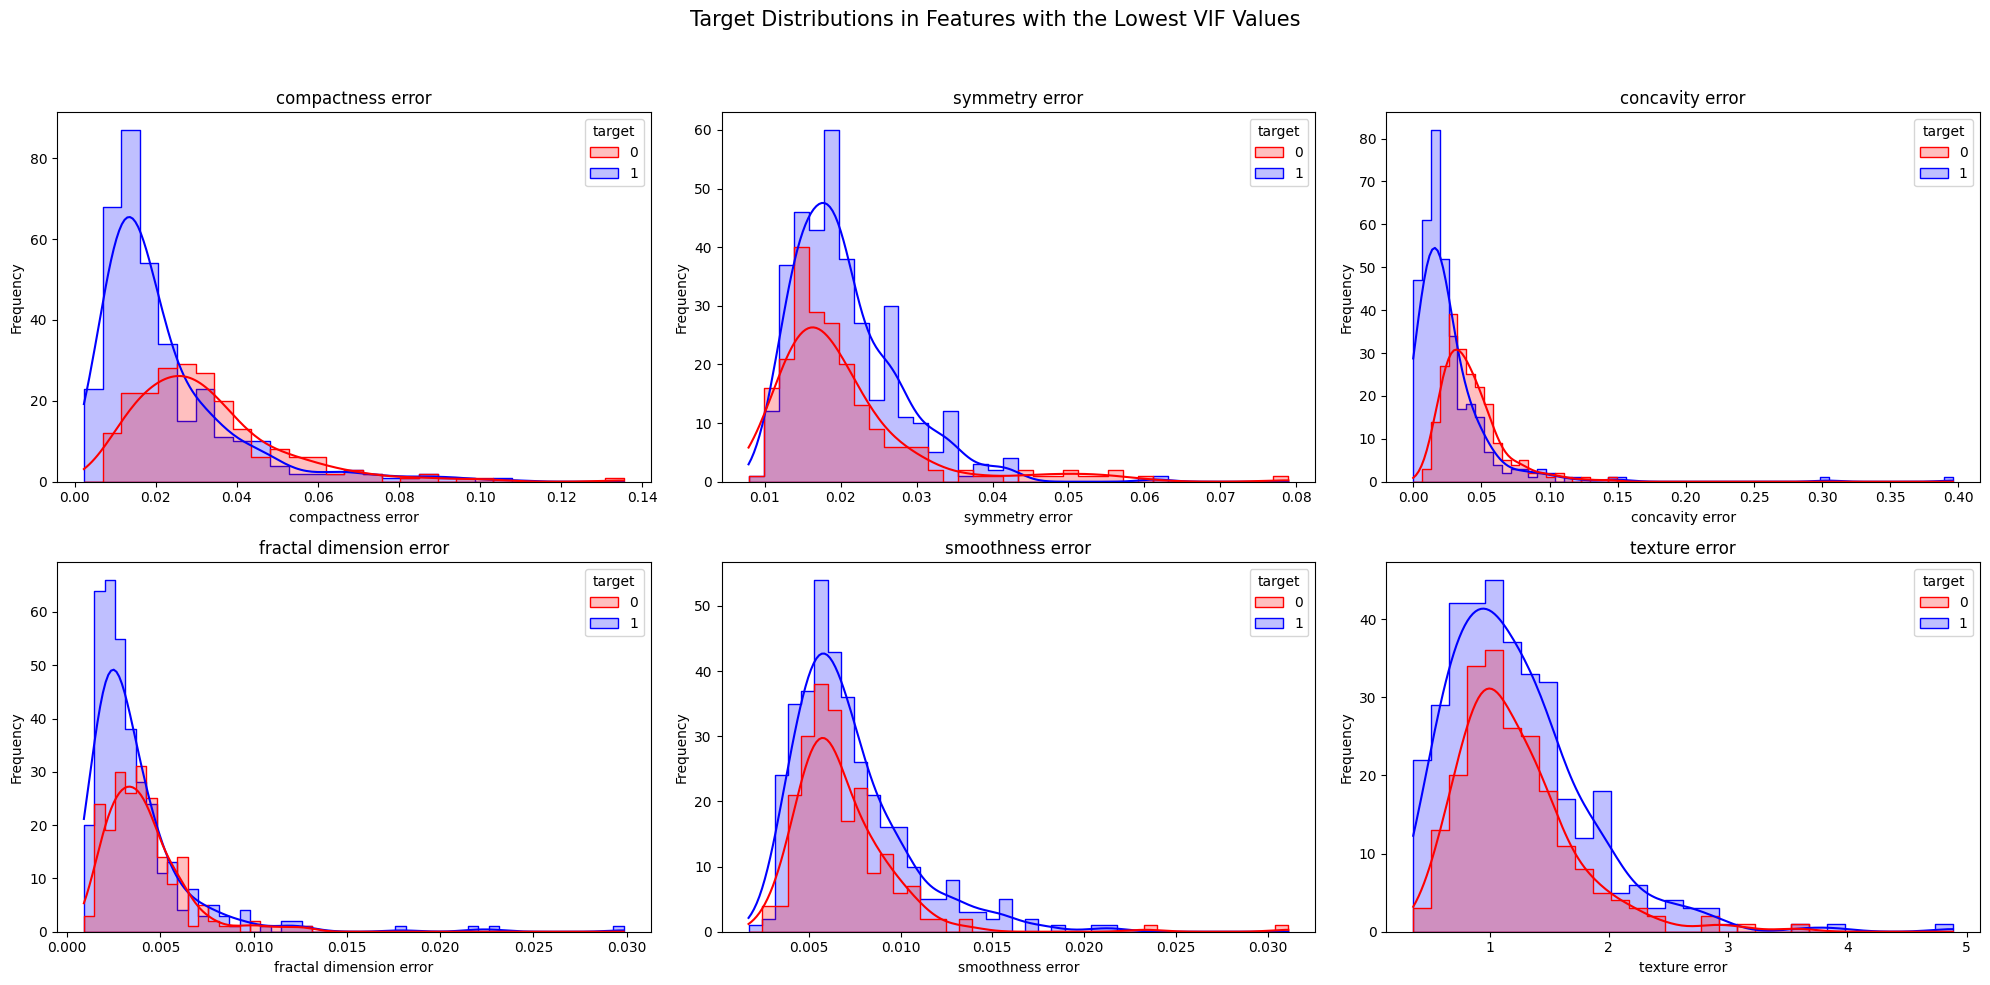

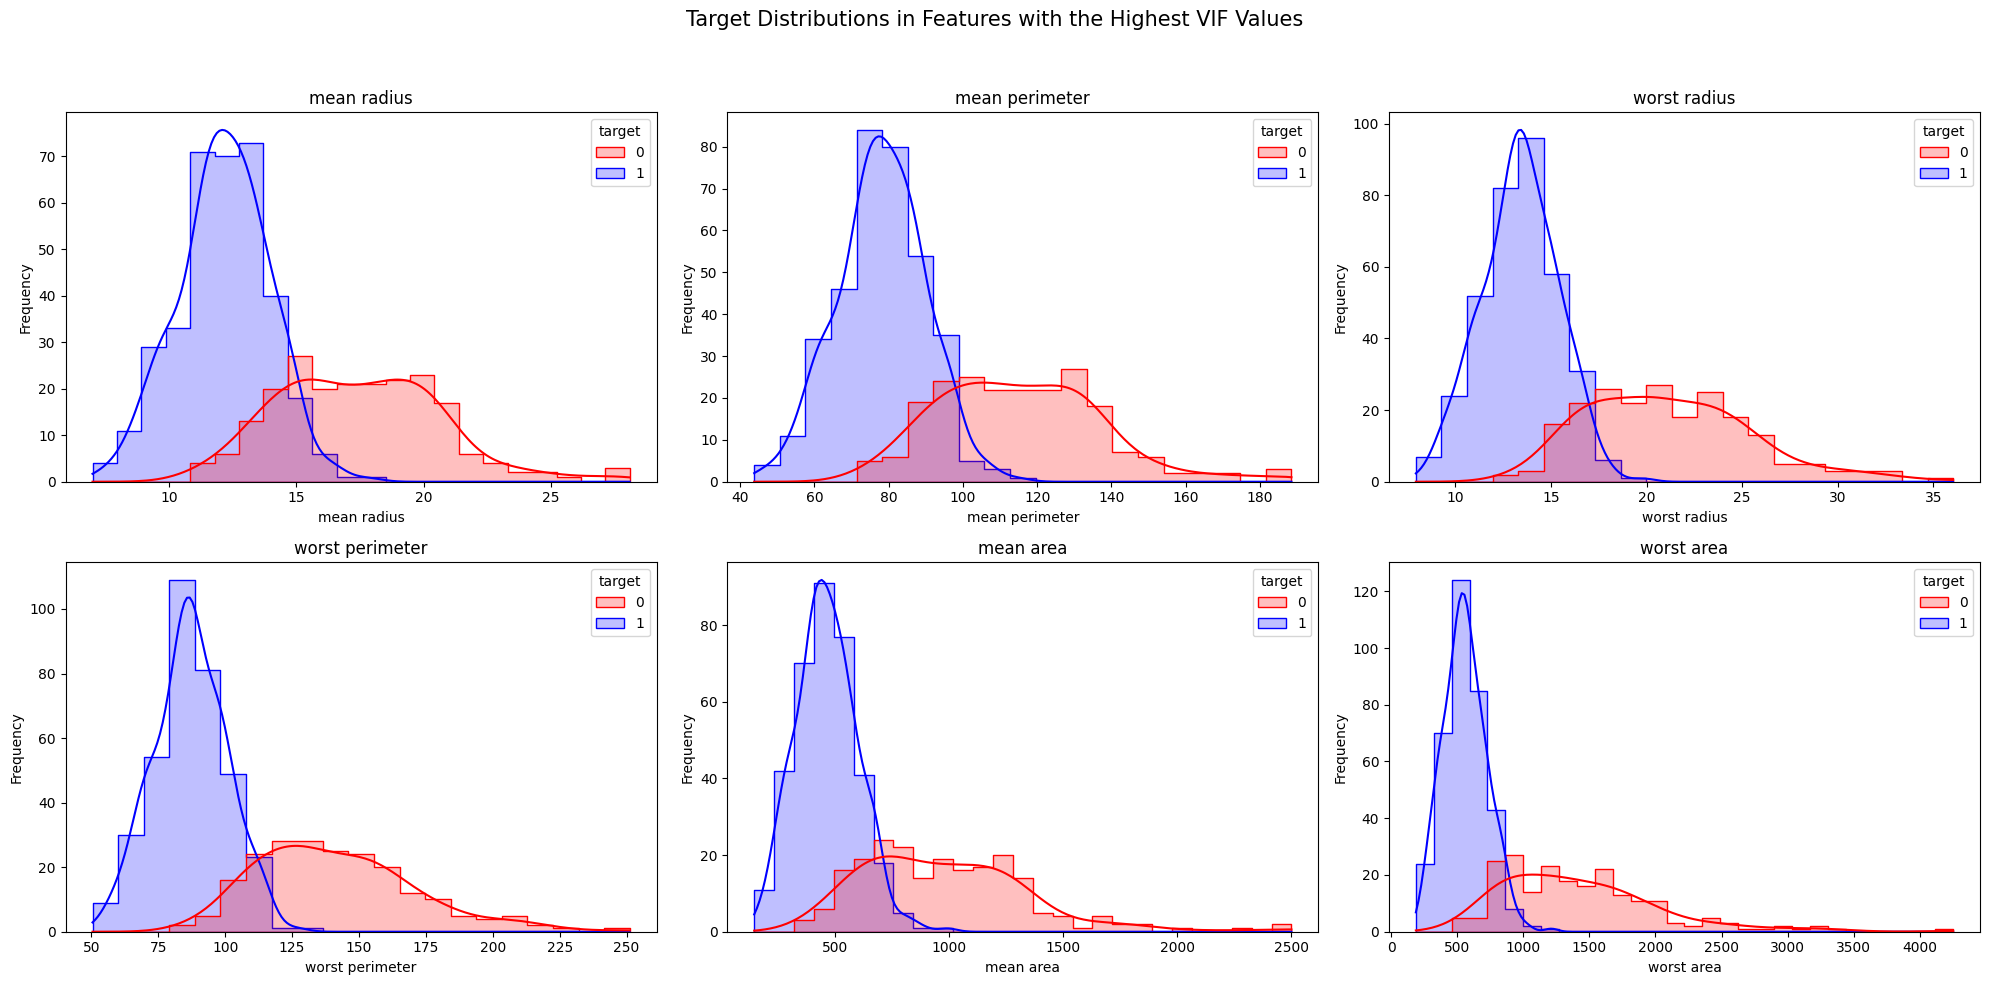

In [20]:
## EXTRA ##
plot_feature_distributions(
    data,
    selection=lowest_vif_features,
    title="Target Distributions in Features with the Lowest VIF Values"
)

plot_feature_distributions(
    data,
    selection=highest_vif_features,
    title="Target Distributions in Features with the Highest VIF Values"
)

With a better feel for the data, it's time to attempt to build a logistic regression model.

1. Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a training and test sets for the data.
2. Use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a model on the training data. Make sure you understand the inputs to the model. Try using the "liblinear" solver here.

**================================================================================================**

**Scaling the dataset**

Scaling features before splitting the dataset prevents inconsistencies between splits. Fitting the scaler on the entire dataset before splitting avoids introducing bias, ensuring more reliable model performance.

This step standardizes the range of variables and enhances the performance of models, making optimization more efficient.

**================================================================================================**

In [21]:
## EXTRA ##
from sklearn.preprocessing import StandardScaler

scaling = True # Set to False to see non-scaled coefficients

scaler = StandardScaler()
if scaling:
    X_ = scaler.fit_transform(X)
else:
    X_ = X

In [22]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_, y,
                                                    test_size=0.3, random_state=42)

In [23]:
# Build and train logistic regression model
from sklearn.preprocessing import StandardScaler

model = LogisticRegression(solver='liblinear')

model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

**================================================================================================**

**Hyperparameter Optimization**

Hyperparameter optimization is the process of finding the best combination of hyperparameters for a machine learning model. Hyperparameters are the settings configured before training, such as the learning rate, regularization strength, or the number of iterations.


**We will use these hyperparameters:**

* **penalty**: Specifies the type of regularization

* **C**: Inverse of regularization strength. Smaller values mean stronger regularization.

* **solver**: Optimization algorithm.

* **max_iter**: Maximum iterations for the solver to converge.

**================================================================================================**

In [24]:
## EXTRA ##
# Building an optimized regression model
import warnings
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

# Hyperparameters
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 9),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter': [10000],
}

optimizer = GridSearchCV(LogisticRegression(),
                      param_grid,
                      cv=3,
                      verbose=True,
                      n_jobs=-1)
optimizer.fit(X_train, y_train)

# Get the optimized model
best_model = optimizer.best_estimator_
best_model

Fitting 3 folds for each of 180 candidates, totalling 540 fits


LogisticRegression(C=0.1, max_iter=10000, solver='liblinear')

As you can see, training a logistic regression model is simple. The more important task is evaluating the model and determining if it's any good. For classification problems, a good starting point for model evaluation is the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It provides a clear and detailed breakdown of how well a model's predictions align with the actual outcomes in a binary classification problem. It's particularly useful for understanding the types of errors a model is making.

A confusion matrix is typically presented as a table with four entries:

- **True Positives (TP):** The number of instances that were correctly predicted as positive (belonging to the positive class).

- **True Negatives (TN):** The number of instances that were correctly predicted as negative (belonging to the negative class).

- **False Positives (FP):** Also known as a Type I error. The number of instances that were predicted as positive but actually belong to the negative class.

- **False Negatives (FN):** Also known as a Type II error. The number of instances that were predicted as negative but actually belong to the positive class.

Here's how these four components fit into the confusion matrix:

```
                Predicted
               |  Positive  |  Negative
Actual  Positive |    TP      |    FN
        Negative |    FP      |    TN
```

Each cell of the confusion matrix represents a specific classification outcome. The goal is to have as many instances as possible in the TP and TN cells, and as few as possible in the FP and FN cells.

From the confusion matrix, several evaluation metrics can be calculated:

- **Accuracy:** The proportion of correctly classified instances out of the total instances.

   `Accuracy = (TP + TN) / (TP + TN + FP + FN)`

- **Precision:** The proportion of correctly predicted positive instances out of all predicted positive instances. It measures the model's ability to avoid false positives.

   `Precision = TP / (TP + FP)`

- **Recall (Sensitivity or True Positive Rate):** The proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to capture all positive instances.

   `Recall = TP / (TP + FN)`

- **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure that takes into account both false positives and false negatives.

   `F1-Score = 2 * (Precision * Recall) / (Precision + Recall)`

Confusion matrices provide valuable insights into the strengths and weaknesses of a classification model. They allow you to understand where the model is making mistakes and guide further improvements or adjustments.

Here are your tasks:

1. Use your model to make predictions on the test data.
2. Generate a confusion matrix with the test results. How many false positives and false negatives did the model predict?
3. Use [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to generate further analysis of your model's predictions. Make sure you understand everything in the report and are able to explain what all the metrics mean.

Note, the macro average in the report calculates the metrics independently for each class and then takes the average across all classes. In other words, it treats all classes equally, regardless of their frequency in the dataset. This can be useful when you want to assess the model's overall performance without being biased by the class imbalances.

The weighted average in the report, on the other hand, calculates the metrics for each class and then takes the average, weighted by the number of true instances for each class. This gives more weight to classes with more instances, which can be particularly useful in imbalanced datasets where some classes might have much fewer instances than others.

In [25]:
# Evaluate the model
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
model_accuracy = accuracy_score(y_test, y_pred)

y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)

print("Regular model:")
print("==========================")
print(f"Prediction accuracy: {model_accuracy:.3f}\n")

print("Optimized model:")
print("==========================")
print(f"Prediction accuracy: {best_accuracy:.3f}")

Regular model:
Prediction accuracy: 0.982

Optimized model:
Prediction accuracy: 0.994


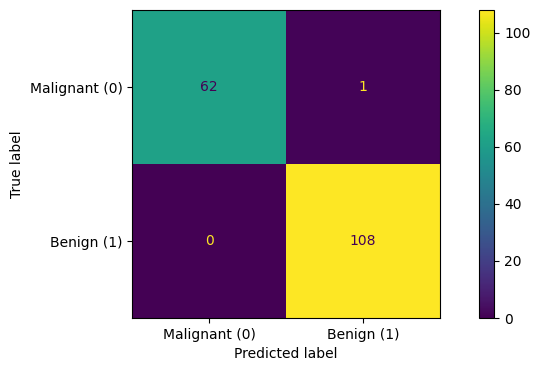

In [26]:
# Generate a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred_best),
    display_labels=['Malignant (0)', 'Benign (1)']
)

fig, ax = plt.subplots(figsize=(10, 4))
disp.plot(ax=ax)

plt.show()

In [27]:
# Generate a classification report
report = classification_report(y_test, y_pred_best)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.99      1.00      1.00       108

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



**================================================================================================**

**Understanding the Metrics**

* **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "Of all the instances predicted as positive, how many are actually positive?"

* **Recall (True Positive Rate)**: Recall is the ratio of correctly predicted positive observations to all observations in the actual class. It answers the question: "Of all the instances that are actually positive, how many were predicted correctly?"

* **F1-Score**: The F1-score is the weighted average of Precision and Recall. It takes both false positives and false negatives into account. It is particularly useful when the class distribution is imbalanced.

* **Support**: Support is the number of actual occurrences of the class in the specified dataset.

* **Macro Avg**: Macro averaging computes the metric independently for each class and then takes the average (treating all classes equally).

* **Weighted Avg**: Weighted averaging computes the metric for each class, and then takes the average weighted by the number of instances of each class (support).

**================================================================================================**

Feature importance refers to the process of determining and quantifying the contribution of each feature (also known as predictor variable or attribute) in a machine learning model towards making accurate predictions. It helps in understanding which features have the most significant impact on the model's output and can be crucial for interpreting and explaining the model's behavior.

In logistic regression models, you can calculate feature importance by examining the coefficients associated with each feature. These coefficients indicate the change in the log-odds of the target variable for a one-unit change in the corresponding feature, while keeping other features constant. The magnitude of the coefficient reflects the strength of the impact that the feature has on the predicted outcome.

The magnitude of the coefficients indicates the importance of each feature. Larger magnitudes imply a stronger impact on the predicted probability of the positive class.

**Positive Coefficient**: An increase in the feature value leads to an increase in the log-odds of the positive class, implying a higher probability of belonging to the positive class.

**Negative Coefficient**: An increase in the feature value leads to a decrease in the log-odds of the positive class, implying a lower probability of belonging to the positive class.

Remember that the scale of the features matters when interpreting coefficients. If features are on different scales, their coefficients won't be directly comparable. This is where normalization can be helpful. Also, keep in mind that this interpretation assumes a linear relationship between the features and the log-odds of the target variable. If your logistic regression model includes interactions or polynomial terms, the interpretation can become more complex. Additionally, be cautious about interpreting coefficients as causal relationships, as logistic regression only captures associations, not causal effects.

Here are your tasks:

1. Extract the model coefficients from your trained model.
2. Normalize the coefficients by the standard deviation of each feature in the training data.
3. Sort feature names and coefficients by absolute value of coefficients.
4. Visualize the feature importances by creating a horizontal bar chart using e.g. [barh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html). Based on magnitude, what appears to be the most important predictor of cancer in this dataset?

In [28]:
# Extract coefficients
coeff = best_model.coef_[0]
coefficients = pd.Series(coeff, index=X.columns)

In [29]:
# Normalize the coefficients by the standard deviation
stdevs = np.std(X_train, axis=0)
if type(stdevs) == pd.Series:
    stdevs = stdevs.values

normalized_coeff = coeff / stdevs
if type(normalized_coeff) == pd.Series:
    normalized_coeff = normalized_coeff.values

print("Original coefficients:", coeff, "\n")
print("Standard deviations:", stdevs, "\n")
print("Normalized coefficients:", normalized_coeff)

Original coefficients: [-0.33063562 -0.36588128 -0.31988323 -0.34946261 -0.15084525  0.02985556
 -0.37471412 -0.47599636 -0.03049375  0.19001185 -0.48031815  0.01239419
 -0.33735058 -0.38504892 -0.05964454  0.23649144  0.01797352 -0.11040904
  0.1503417   0.25195212 -0.46099531 -0.55541781 -0.40918197 -0.44121726
 -0.36357551 -0.13736143 -0.41510393 -0.45350889 -0.45797819 -0.09206403] 

Standard deviations: [1.00293511 0.97941057 0.99923287 1.01936714 0.97844697 0.96925948
 0.97600115 0.97150734 0.97980786 1.02622536 1.04698617 0.94109116
 1.04523247 1.07417162 1.03673036 1.00447199 0.99528599 1.00993789
 0.96939299 1.00145303 0.99268281 0.97869109 0.98417223 1.00207428
 1.0079721  0.94425437 0.9397994  0.9715367  1.00690293 0.96954717] 

Normalized coefficients: [-0.329668   -0.37357293 -0.32012881 -0.34282311 -0.15416804  0.03080244
 -0.38392794 -0.48995652 -0.03112218  0.18515607 -0.45876265  0.01317003
 -0.32275172 -0.35846127 -0.05753139  0.23543856  0.01805865 -0.1093226
  0.155

In [30]:
# Sort feature names and coefficients by absolute value of coefficients
features = pd.DataFrame(X.columns, columns=['Feature'])
n_coeff = pd.DataFrame(normalized_coeff, columns=['Coefficient'])

features.reset_index(drop=True, inplace=True)
n_coeff.reset_index(drop=True, inplace=True)

coeff_df = pd.concat([features, n_coeff], axis=1)

sorted_df = coeff_df.iloc[coeff_df['Coefficient'].abs().argsort()[::-1]]
sorted_df

,Feature,Coefficient
21,worst texture,-0.567511
7,mean concave points,-0.489957
27,worst concave points,-0.466795
20,worst radius,-0.464393
10,radius error,-0.458763
28,worst symmetry,-0.454838
26,worst concavity,-0.441694
23,worst area,-0.440304
22,worst perimeter,-0.415763
6,mean concavity,-0.383928


In [31]:
## EXTRA ##
FEATURES = pd.DataFrame(X.columns, columns=['Feature'])


def extract_coeffs(model, formatted=True):
    coeff = model.coef_[0]
    stdevs = np.std(X_train, axis=0)
    norm_coeff = coeff / stdevs

    if formatted:
        extract = pd.DataFrame(normalized_coeff, columns=['Coefficient'])
    else:
        extract = norm_coeff

    return extract


def get_feature_coeff_df(model, features=FEATURES, sort=True):
    coeffs = extract_coeffs(model)

    coeffs.reset_index(drop=True, inplace=True)
    features.reset_index(drop=True, inplace=True)

    coeff_df = pd.concat([features, coeffs], axis=1)

    if sort:
        coeff_df = coeff_df.iloc[coeff_df['Coefficient'].abs().argsort()[::-1]]

    return coeff_df


def visualize_coefficients(coeff_df, figsize=(10, 6), title='Feature Importances'):
    plt.figure(figsize=figsize)

    plt.barh(coeff_df['Feature'], coeff_df['Coefficient'].abs())

    plt.xlabel('Absolute Coefficient (Importance)')
    plt.ylabel('Feature')
    plt.title(title)
    plt.show()

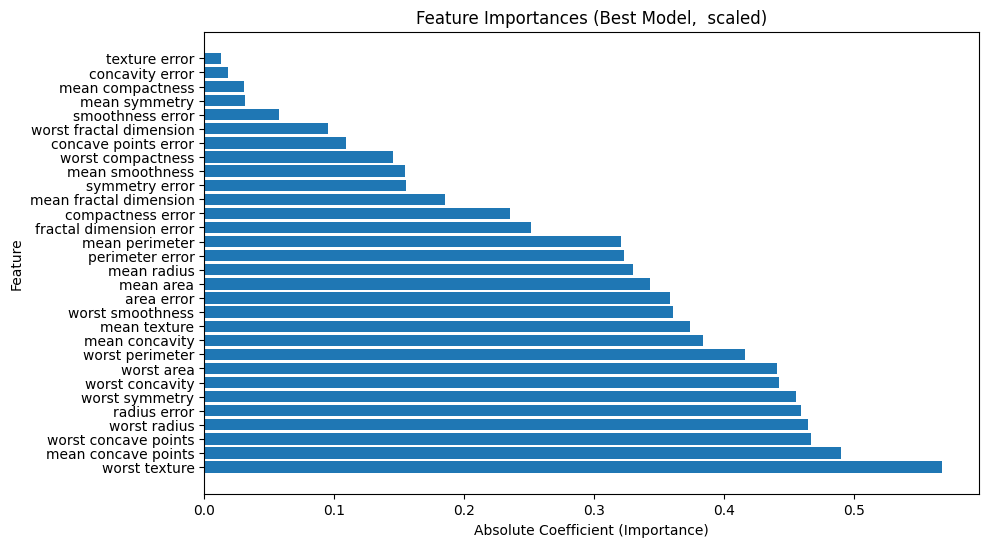

In [32]:
# Visualize feature importances
model_coeff_df = get_feature_coeff_df(model)
best_model_coeff_df = get_feature_coeff_df(best_model)

visualize_coefficients(
    best_model_coeff_df,
    title=f"Feature Importances (Best Model, {int(not scaling) * 'not'} scaled)"
)